## Гауссово распределение, линейный дискриминантный анализ и наивный байес

### 1. Многомерное гауссово распределение
Создайте случайную выборку данных с двумерным гауссовым распределением. Для этого сперва сделайте два вектора из двух одномерных распределений с разными стандартными отклонениями $\sigma_1$ и $\sigma_2$, как показано ниже:  
``` python
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
```
После чего сделайте матрицу поворота на угол $\alpha$ и с помощью неё поверните набор точек в пространстве.  
Посчитайте матрицу ковариации для сгенерированных точек.  
Нарисуйте полученное облако точек и сравните его с облаком точек, полученных с помощью готовой функции:  `np.random.multivariate_normal()`


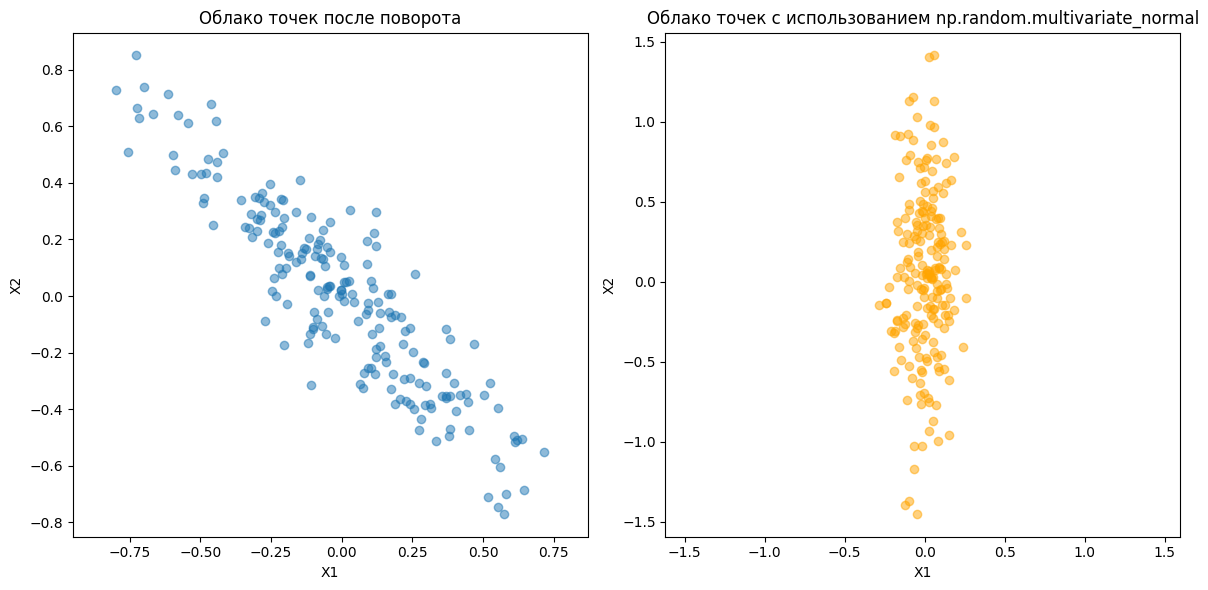

Матрица ковариации для сгенерированных точек:
[[ 0.10396965 -0.09649734]
 [-0.09649734  0.10884189]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

alpha = np.pi / 4
rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                             [np.sin(alpha), np.cos(alpha)]])
X_rotated = X @ rotation_matrix.T


cov_matrix = np.cov(X_rotated, rowvar=False)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.5)
plt.title('Облако точек после поворота')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')

# Облако точек с использованием np.random.multivariate_normal
mean = [0, 0]
cov = [[sigma1**2, 0], [0, sigma2**2]]
X_multivariate = np.random.multivariate_normal(mean, cov, M)
plt.subplot(1, 2, 2)
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], alpha=0.5, color='orange')
plt.title('Облако точек с использованием np.random.multivariate_normal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')

plt.tight_layout()
plt.show()

print("Матрица ковариации для сгенерированных точек:")
print(cov_matrix)

### 2. Плотность вероятности гауссового распределения
В общем виде $n$-мерное гауссово распределение имеет вид:  
$$p(x) = \frac{1}{(\sqrt{2\pi})^n \sqrt{detC}} e^{-\frac{1}{2}(x-\mu)^TС^{-1}(x-\mu)} \tag{1}$$  
где $x\in{R^n}$, $\mu\in{R^n}$ - среднее значение, $C$ - матрица ковариации.  

Сгенерируйте набор точек в двумерном пространстве (как делали в пункте 1 или другим способом). Посчитайте для них среднее значение и матрицу ковариации $\mu$ и $C$. Для оценки плотности вероятности (probability density function - `pdf`) гауссового распределения в произвольной точке используйте `scipy.stats.multivariate_normal` 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), либо можете посчитать вручную.  

Визуализируйте набор точек и плотность вероятности, для чего изобразите точки одним цветом, а фон раскрасьте в соответсвии с плотностью вероятности, для чего можете использовать пример ниже:  

``` python
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
```

Среднее значение (mu): [-0.08195555 -0.04533643]
Матрица ковариации (C):n [[0.25199114 0.21047467]
 [0.21047467 0.55729462]]


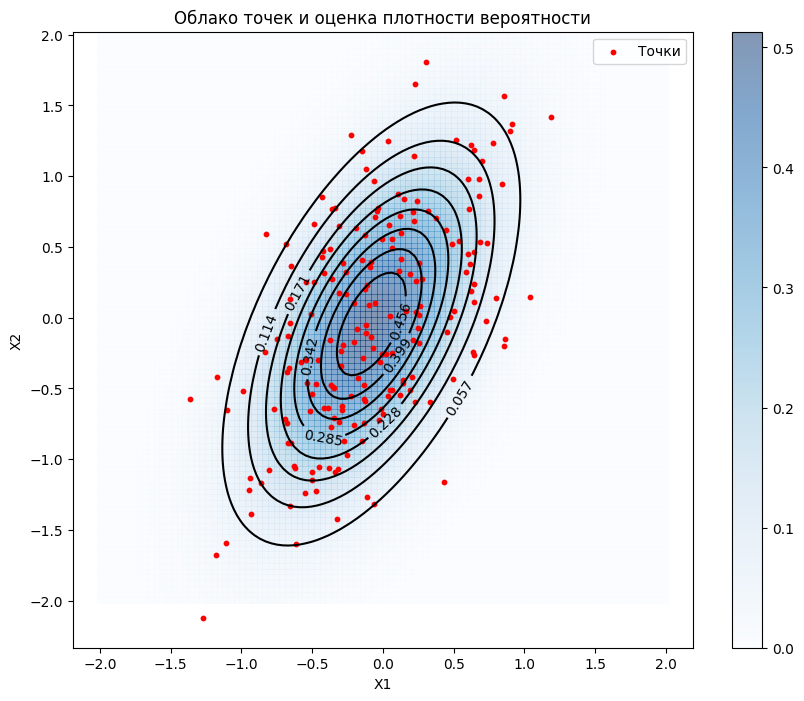

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

M = 200
mean = [0, 0]
cov = [[0.3, 0.2], [0.2, 0.5]]

data = np.random.multivariate_normal(mean, cov, M)
mu = np.mean(data, axis=0)
C = np.cov(data, rowvar=False)

print("Среднее значение (mu):", mu)
print("Матрица ковариации (C):n", C)

xx = np.linspace(-2, 2, 100)
yy = np.linspace(-2, 2, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=mu, cov=C)
ZZ = m.pdf(pp).reshape(XX.shape)


plt.figure(figsize=(10, 8))
IMG = plt.pcolor(XX, YY, ZZ, shading='auto', cmap='Blues', alpha=0.5)
plt.colorbar(IMG)
plt.scatter(data[:, 0], data[:, 1], color='red', s=10, label='Точки')
CS = plt.contour(XX, YY, ZZ, levels=np.linspace(0, np.max(ZZ), 10), colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.title('Облако точек и оценка плотности вероятности')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.legend()
plt.show()

### 3. Бинарная классификация

**Задание** 
Создайте случайный датасет, состоящий из двух классов $y\in{\{0, 1\}}$, а признаки имеют две координаты. Посчитайте для каждого класса среднее значение и матрицу ковариации $\mu_0, \mu_1$ и $C_0, C_1$.

Решение задачи классификации можно свести к оценке максимальной апостериорной вероятности (Maximum a posterior - MAP):
$$y = \underset{y\in{0,1}}{argmax} p(y|x) \tag{2}$$  
которая в свою очередь через теорему Байеса равна:  
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} \tag{3}$$
В последней формуле вероятность p(y) называется априорной и не зависит от $x$ - оценить её можно просто как долю точек датасета принадлежащего заданному классу $y$. Вероятность p(x|y) называют правдоподобием (likelyhood). Обычно правдоподобие моделируется некоторой генерирующей моделью, например по формуле гаусса (1), и говорит насколько правдоподобно что точка с координатами $x$ могла быть "сгенерирована" в классе $y$. Знаменатель $p(x)$ в последней формуле не зависит от $y$, поэтому на него внимание не обращаем.  

Таким образом, для бинарной классификации, т.е. для оценки принадлежности некоторой точки $x$ к классу 0 или 1, нужно сравнить две величины:  
$$p(x|y=0)p(y=0) \overset{?}{<>} p(x|y=1)p(y=1) \tag{4}$$

**Задание**
Визуализируейте на одном рисунке датасет с точками обоих классов разными цветами. Раскрасьте фон изображения в соответствии с разностью левой и правой частей уравнения (4). Постройте на этом же рисунке разделяющую кривую, т.е. кривую соответствующую нулевой разнице между левой и правой частями. Для её построения используйте функции `plt.contour` с указанием конкретного уровня.

Класс 0:
Среднее значение (mu_0): [ 0.02251763 -0.03418094]
Матрица ковариации (C_0):n [[0.27912132 0.19371053]
 [0.19371053 0.53587627]]
nКласс 1:
Среднее значение (mu_1): [0.99474148 1.01625181]
Матрица ковариации (C_1):n [[ 0.50720992 -0.30294878]
 [-0.30294878  0.40235798]]


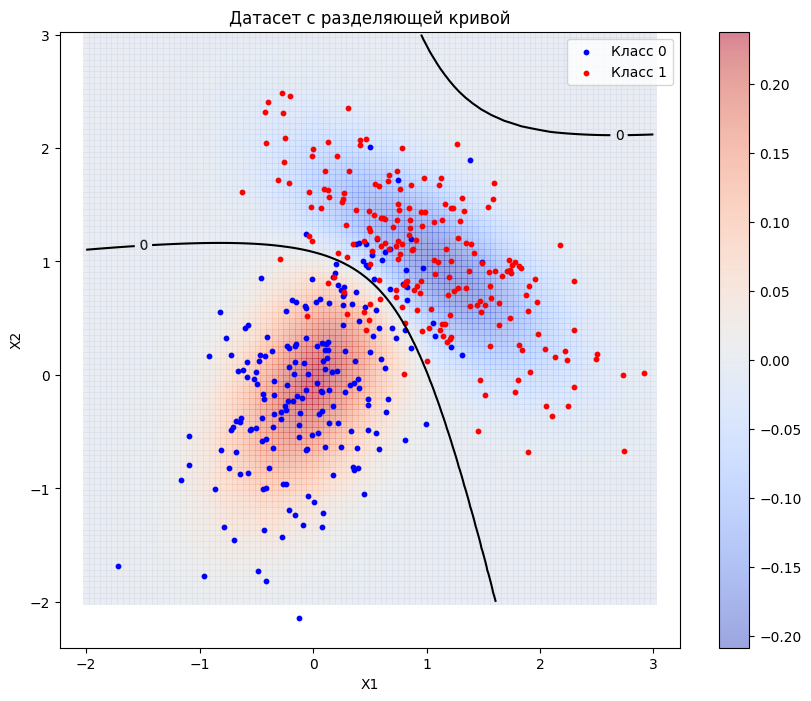

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

M = 200
mean_0 = [0, 0]
cov_0 = [[0.3, 0.2], [0.2, 0.5]]

mean_1 = [1, 1]
cov_1 = [[0.5, -0.3], [-0.3, 0.4]]

data_0 = np.random.multivariate_normal(mean_0, cov_0, M)
data_1 = np.random.multivariate_normal(mean_1, cov_1, M)

mu_0 = np.mean(data_0, axis=0)
C_0 = np.cov(data_0, rowvar=False)

mu_1 = np.mean(data_1, axis=0)
C_1 = np.cov(data_1, rowvar=False)

print("Класс 0:")
print("Среднее значение (mu_0):", mu_0)
print("Матрица ковариации (C_0):n", C_0)

print("nКласс 1:")
print("Среднее значение (mu_1):", mu_1)
print("Матрица ковариации (C_1):n", C_1)

xx = np.linspace(-2, 3, 100)
yy = np.linspace(-2, 3, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

# Вероятности p(x|y) для каждого класса
p_x_given_y0 = multivariate_normal.pdf(pp, mean=mu_0, cov=C_0)
p_x_given_y1 = multivariate_normal.pdf(pp, mean=mu_1, cov=C_1)

# Оценка априорной вероятности p(y)
p_y0 = M / (2 * M)  # Доля точек класса 0
p_y1 = M / (2 * M)  # Доля точек класса 1

difference = p_x_given_y0 * p_y0 - p_x_given_y1 * p_y1

plt.figure(figsize=(10, 8))
IMG = plt.pcolor(XX, YY, difference.reshape(XX.shape), shading='auto', cmap='coolwarm', alpha=0.5)
plt.colorbar(IMG)
plt.scatter(data_0[:, 0], data_0[:, 1], color='blue', s=10, label='Класс 0')
plt.scatter(data_1[:, 0], data_1[:, 1], color='red', s=10, label='Класс 1')

contour_level = [0]
CS = plt.contour(XX, YY, difference.reshape(XX.shape), levels=contour_level, colors='black')
plt.clabel(CS, inline=True, fontsize=10)

plt.title('Датасет с разделяющей кривой')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.legend()
plt.show()

### 4. LDA (linear discriminant analysis)

**Задание** Рассмотрите частный случай, когда для точек двух классов матрицы ковариации совпадают, т.е. $C_0=C_1$, но средние значения отличаются $\mu_0\neq\mu_1$. Выпишите явное выражение для разделяющей поверхности в этом случае. Визуализируйте такой случай аналогично предыдущему пункту. Про линейный и квадратичный дискриминантный анализ можете почитать здесь (https://scikit-learn.org/stable/modules/lda_qda.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)

Реализуйте классификатор на основе метода линейного дискриминантного анализа по шаблону ниже. Данный алгоритм предполагает одинаковость матриц ковариации (т.е. считает одну общую матрицу ковариации, но разные средние) и использует линейное правило классификации. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```


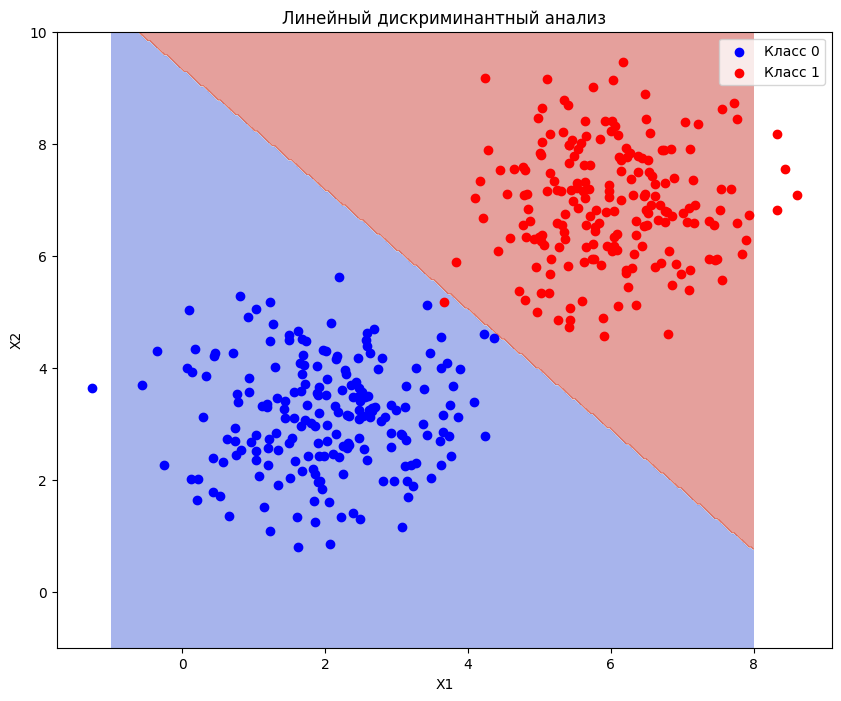

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
  def __init__(self):
    self.w = None
    self.b = None

  def fit(self, X, y):
    classes = np.unique(y)
    self.mu = [np.mean(X[y == cls], axis=0) for cls in classes]
    self.C = np.cov(X, rowvar=False)
    self.w = np.linalg.inv(self.C).dot(self.mu[1] - self.mu[0])
    self.b = -0.5 * (self.mu[1].T.dot(np.linalg.inv(self.C)).dot(self.mu[1]) -
             self.mu[0].T.dot(np.linalg.inv(self.C)).dot(self.mu[0]))

  def predict(self, X):
    discriminant_value = X.dot(self.w) + self.b
    return np.where(discriminant_value > 0, 1, 0)

M = 200
mean_0 = np.array([2, 3])
mean_1 = np.array([6, 7])

cov = np.array([[1, 0], [0, 1]])

data_0 = np.random.multivariate_normal(mean_0, cov, M)
data_1 = np.random.multivariate_normal(mean_1, cov, M)

X = np.vstack((data_0, data_1))
y = np.array([0] * M + [1] * M)

model = myLDA()
model.fit(X, y)

x_values = np.linspace(-1, 8, 300)
y_values = np.linspace(-1, 10, 300)
X1, X2 = np.meshgrid(x_values, y_values)
grid = np.c_[X1.ravel(), X2.ravel()]

predictions = model.predict(grid).reshape(X1.shape)

plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, predictions, alpha=0.5, cmap='coolwarm')
plt.scatter(data_0[:, 0], data_0[:, 1], color='blue', label='Класс 0')
plt.scatter(data_1[:, 0], data_1[:, 1], color='red', label='Класс 1')
plt.title('Линейный дискриминантный анализ')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

### 5. Наивный байесовый классификатор (NaiveBayes)

**Задание** 
Прочитать по наивный байесовый подход можно здесь (https://scikit-learn.org/stable/modules/naive_bayes.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii).  

Суть наивного предположения состоит в том, чтобы не считать совместную плотность вероятности для $n$-мерного случая, а рассматривать каждую переменную как независимую и считать одномерные распределения:  
$$p(x_1,x_2,...,x_n|y) => \prod\limits_{i=1}^{n}p(x_i|y)$$  
Это можно также рассматривать как обнуление всех внедиагональных элементов матрицы ковариации.  

**Задание** 
Реализуйте классификатор на основе наивного байесового подхода с одномерным гауссовым распределением для каждой переменной. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```

In [8]:
import numpy as np
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        self.classes_ = None
        self.means_ = None
        self.variances_ = None
        self.priors_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_features = X.shape[1]
        
        self.means_ = np.zeros((len(self.classes_), n_features))
        self.variances_ = np.zeros((len(self.classes_), n_features))
        self.priors_ = np.zeros(len(self.classes_))

        for i, cls in enumerate(self.classes_):
            X_cls = X[y == cls]
            self.means_[i, :] = np.mean(X_cls, axis=0)
            self.variances_[i, :] = np.var(X_cls, axis=0)
            self.priors_[i] = len(X_cls) / len(X)

    def predict(self, X):
        log_likelihoods = []
        
        for i in range(len(self.classes_)):
            mean = self.means_[i]
            var = self.variances_[i]
            prior = np.log(self.priors_[i])
            
            log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * var)) - 0.5 * np.sum(((X - mean) ** 2) / var, axis=1)
            log_likelihoods.append(log_likelihood + prior)
        
        log_likelihoods = np.array(log_likelihoods)
        return self.classes_[np.argmax(log_likelihoods, axis=0)]

M = 200
mean_0 = [0, 0]
mean_1 = [2, 2]
cov = [[1, 0.5], [0.5, 1]]

data_0 = np.random.multivariate_normal(mean_0, cov, M)
data_1 = np.random.multivariate_normal(mean_1, cov, M)

X = np.vstack((data_0, data_1))
y = np.array([0] * M + [1] * M)

nb_classifier = myNB()
nb_classifier.fit(X, y)

predictions = nb_classifier.predict(X)

accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


### 6. Сравнение двух алгоритмов: LDA и NB

Создайте датасет для бинарной классификации, либо вручную либо используйте функцию `sklearn.datasets.make_classification`
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)  

Разделите датасет на обучающую и тестовую подвыборки.  
Проверьте работоспособность разработанных вами двух алгоритмов.  
Посчитайте основные метрики классификации: долю правильных ответов (accuracy), точность (Precision) и полноту (Recall).  
(про метрики прочитайте здесь https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)  
Сделайте выводы.  

In [13]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

class myNB:
    def __init__(self):
        self.classes_ = None
        self.means_ = None
        self.variances_ = None
        self.priors_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_features = X.shape[1]
        
        self.means_ = np.zeros((len(self.classes_), n_features))
        self.variances_ = np.zeros((len(self.classes_), n_features))
        self.priors_ = np.zeros(len(self.classes_))

        for i, cls in enumerate(self.classes_):
            X_cls = X[y == cls]
            self.means_[i, :] = np.mean(X_cls, axis=0)
            self.variances_[i, :] = np.var(X_cls, axis=0)
            self.priors_[i] = len(X_cls) / len(X)

    def predict(self, X):
        log_likelihoods = []
        
        for i in range(len(self.classes_)):
            mean = self.means_[i]
            var = self.variances_[i]
            prior = np.log(self.priors_[i])
            
            log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * var)) - 0.5 * np.sum(((X - mean) ** 2) / var, axis=1)
            log_likelihoods.append(log_likelihood + prior)
        
        log_likelihoods = np.array(log_likelihoods)
        return self.classes_[np.argmax(log_likelihoods, axis=0)]

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение Наивного Байеса
nb_classifier = myNB()
nb_classifier.fit(X_train, y_train)

nb_predictions = nb_classifier.predict(X_test)

# Обучение Линейного Дискриминантного Анализа
lda_classifier = myLDA()
lda_classifier.fit(X_train, y_train)

lda_predictions = lda_classifier.predict(X_test)

# Вычисление метрик для Наивного Байеса
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)

# Вычисление метрик для LDA
lda_accuracy = accuracy_score(y_test, lda_predictions)
lda_precision = precision_score(y_test, lda_predictions)
lda_recall = recall_score(y_test, lda_predictions)

# Вывод результатов
print("Наивный Байес:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")

print("\nЛинейный Дискриминантный Анализ:")
print(f"Accuracy: {lda_accuracy:.2f}")
print(f"Precision: {lda_precision:.2f}")
print(f"Recall: {lda_recall:.2f}")

Наивный Байес:
Accuracy: 0.86
Precision: 0.93
Recall: 0.78

Линейный Дискриминантный Анализ:
Accuracy: 0.80
Precision: 0.91
Recall: 0.69
